**Load The Data**

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/datasets/auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


**Exploratory Data Analysis**

In [2]:
df.shape

(398, 9)

In [3]:
df.describe()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
model year,int64
origin,int64
car name,object


**Identifying Null Values**

In [6]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


**Coverting Object to Numeric Data type**

In [7]:
df["horsepower"]=pd.to_numeric(df["horsepower"],errors="coerce")


**Separate Input Features (x) & Target(y)**

In [8]:
x=df.drop(["car name","mpg"],axis=1)
y=df["mpg"]

In [9]:
print(x)

     cylinders  displacement  horsepower  weight  acceleration  model year  \
0            8         307.0       130.0    3504          12.0          70   
1            8         350.0       165.0    3693          11.5          70   
2            8         318.0       150.0    3436          11.0          70   
3            8         304.0       150.0    3433          12.0          70   
4            8         302.0       140.0    3449          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0    2790          15.6          82   
394          4          97.0        52.0    2130          24.6          82   
395          4         135.0        84.0    2295          11.6          82   
396          4         120.0        79.0    2625          18.6          82   
397          4         119.0        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

In [10]:
print(y)

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64


**Splitting Training and Testing Data**

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


**Model Fitting**

In [13]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42
)

model.fit(x_train, y_train)


RandomForestRegressor(max_depth=12, n_estimators=200, random_state=42)

**Making Prediction**

In [15]:
y_pred = model.predict(x_test)
print(y_pred)

[30.8465     29.55328571 20.2871875  14.82404497 14.16477693 25.765
 26.73948604 11.89       17.9105     18.63605556 13.865      33.88718712
 27.767      14.67562121 24.92596667 12.1675     29.90366667 19.217
 15.351      35.91880498 23.90809167 19.21305556 29.885      28.55908333
 16.26701136 37.000875   25.15479167 24.77149445 19.90381071 12.43916667
 27.81728604 34.7334381  17.957      24.78442674 38.2524149  13.415
 21.85912083 18.48125    14.45981891 26.01458333 26.23666667 27.9995
 20.74952778 11.485      23.43019897 34.82514773 26.00175    23.11684845
 24.25983115 27.0605     22.85416667 34.15893712 32.91721875 12.73954545
 26.343      13.31916667 16.38       29.78977273 24.00258403 19.40086003
 14.16390909 30.579      24.45257897 20.69054167 19.13325556 25.27310829
 23.37800694 34.68358023 27.3545     14.40348873 35.12283333 14.35036752
 13.7        18.7095     28.32408333 20.81274167 18.81588571 29.4105
 28.7125     17.4939    ]


**Model Evaluation**

In [17]:

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("r2_score",r2_score)

mae: 1.6234657851273517
mse: 4.9618408042974576
r2_score 0.9077149155081052


**Feature Importance**

In [19]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


        Feature  Importance
1  displacement    0.400362
3        weight    0.163392
2    horsepower    0.154882
0     cylinders    0.136558
5    model year    0.112772
4  acceleration    0.026855
6        origin    0.005180


**Feature Importance Visualization**

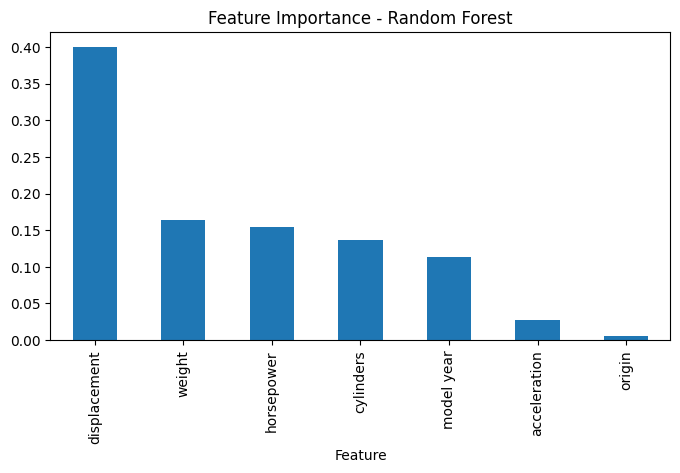

In [20]:
import matplotlib.pyplot as plt
feature_importance_df.plot(
    x='Feature',
    y='Importance',
    kind='bar',
    legend=False,
    figsize=(8,4),
    title="Feature Importance - Random Forest"
)
plt.show()


**User Input Prediction**

In [22]:
import numpy as np
print("Enter Car Details:")

cylinders = float(input("Cylinders: "))
displacement = float(input("Displacement: "))
horsepower = float(input("Horsepower: "))
weight = float(input("Weight: "))
acceleration = float(input("Acceleration: "))
model_year = float(input("Model Year: "))
origin = float(input("Origin (1=USA, 2=Europe, 3=Japan): "))

user_input = np.array([[cylinders, displacement, horsepower, weight,
                        acceleration, model_year, origin]])

prediction = model.predict(user_input)

print("\nPredicted MPG:", prediction[0])


Enter Car Details:
Cylinders: 4
Displacement: 120
Horsepower: 88
Weight: 2957
Acceleration: 15.5
Model Year: 76
Origin (1=USA, 2=Europe, 3=Japan): 2

Predicted MPG: 22.492478267973866


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
